<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Import libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd

import string
import spacy

from collections import Counter

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
from IPython import display

import praw
import requests
import json
from pprint import pprint
from datetime import datetime, date, time
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
sns.set(style = 'darkgrid', context='talk', palette='Dark2')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
path_auth = 'auth_reddit.json'
auth = json.loads(open(path_auth).read())
#pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

my_user_agent = auth['my_user_agent']
my_client_id = auth['my_client_id']
my_client_secret = auth['my_client_secret']
my_username = auth['my_username']
my_password = auth['my_password']

In [5]:
reddit = praw.Reddit(client_id = my_client_id,
                     client_secret = my_client_secret,
                     user_agent = my_user_agent,
                     username = my_username,
                     password = my_password)
print(reddit.read_only)  # Output: False

False


Version 7.2.0 of praw is outdated. Version 7.3.0 was released Thursday June 17, 2021.


In [6]:
%%time
from praw.models import MoreComments

submission1 = reddit.submission(id="jp4ugz")

text = []
for top_level_comment in submission1.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    text.append(top_level_comment.body)
    
# https://www.reddit.com/r/PS5/comments/k3oxwo/ps5_2_week_review/
submission2 = reddit.submission(id="k3oxwo")

for top_level_comment in submission2.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    text.append(top_level_comment.body)

# https://www.reddit.com/r/PS5/comments/jqh7fw/digital_foundrys_ps5_review/

submission3 = reddit.submission(id="jqh7fw")

for top_level_comment in submission3.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    text.append(top_level_comment.body)
    
# https://www.reddit.com/r/PS5/comments/jrl0j0/bbc_ps5_review_if_the_ps4_was_greatness_awaits/

submission4 = reddit.submission(id="jrl0j0")

for top_level_comment in submission4.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    text.append(top_level_comment.body)
    
# https://www.reddit.com/r/PS5/comments/kcmn9y/hows_your_first_month_with_ps5_been/

submission5 = reddit.submission(id="kcmn9y")

for top_level_comment in submission5.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    text.append(top_level_comment.body)

print(len(text))

360
Wall time: 13.4 s


In [7]:
sia = SIA()
results = []
for line in text:
    scores = sia.polarity_scores(line)
    scores['text'] = line
    results.append(scores)
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,text
0,0.000,1.000,0.000,0.0000,[removed]
1,0.000,0.837,0.163,0.5106,"Will keep adding more reviews as they come in,..."
2,0.189,0.674,0.137,-0.2263,"Damn, most - if not all of these reviews are g..."
3,0.000,1.000,0.000,0.0000,Any review mention the 3D audio and how it wor...
4,0.000,0.783,0.217,0.5965,"So much praise for the controller, I guess I r..."


In [8]:
df['label'] = 0
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1
df.sample(10)

,neg,neu,pos,compound,text,label
315,0.000,0.732,0.268,0.9777,It’s been great and the system is smooth.easy ...,1
164,0.112,0.706,0.182,0.9491,its been absolutely amazing. ive had mine sinc...,1
61,0.051,0.888,0.061,0.3029,After a weekend of playing Demon Souls my main...,1
263,0.000,0.644,0.356,0.8773,"My USB cable doesn't work, and I'm having an i...",1
3,0.000,1.000,0.000,0.0000,Any review mention the 3D audio and how it wor...,0
165,0.051,0.659,0.289,0.8176,Great as long as I pretend Cyberpunk didn't ha...,1
278,0.231,0.769,0.000,-0.5106,trying to buy it multiple times and failing. E...,-1
47,0.084,0.781,0.135,0.9329,Ah man that kotaku review. It definitely feels...,1
212,0.000,0.694,0.306,0.8763,Good. It crashed a couple of times early on bu...,1
75,0.000,0.739,0.261,0.8126,These guys do great work on the tech side of t...,1


In [9]:
print("positive headlines:\n")
pprint(list(df[df['label'] == 1].text)[:5],width = 100)

print("\nnegative headlines:\n")
pprint(list(df[df['label'] == -1].text)[:5],width = 100)

positive headlines:

['Will keep adding more reviews as they come in, feel free to comment any for me to add.',
 'So much praise for the controller, I guess I really have to try it out for myself.',
 "Just a reminder, don't trust anything from We Got This Covered.  I used to be an editor there, "
 'the owner of the site is super crooked and often pushed people to "just start writing" '
 'regardless of where they are.',
 'PC Gamer\'s review is like "Well, it\'s a good gaming console. Anyway, let talk about how PC is '
 'more superior over Ps5"',
 'Is the new controller better for people with larger hands?']

negative headlines:

['Damn, most - if not all of these reviews are glowing. The clear downside is the lack of a '
 'feature like Quick Resume and the 625gb of storage allocated for the console.',
 'What the hell is the kotaku review. Its suppose to be a console review, not a essay on human '
 'equalities.',
 'How many games yall playing at the same time where the 10-20 second diffe

In [10]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)

 1    236
 0     65
-1     59
Name: label, dtype: int64
 1    65.555556
 0    18.055556
-1    16.388889
Name: label, dtype: float64


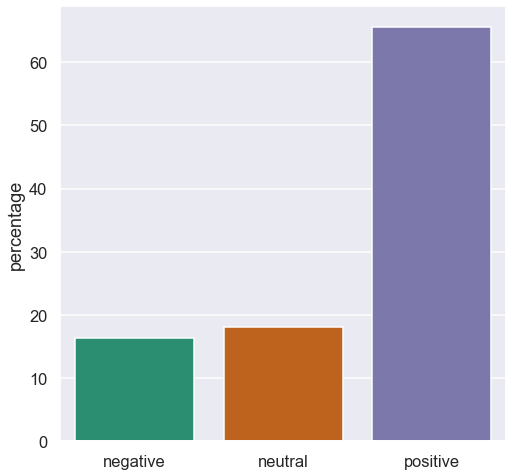

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
counts = df.label.value_counts(normalize = True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['negative', 'neutral', 'positive'])
ax.set_ylabel("percentage")
plt.show()

In [12]:
nlp = spacy.load('en_core_web_sm')

In [13]:
def convert_text(text):
    '''
    Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.
    '''
    sent = nlp(text)
    ents = {x.text: x for x in sent.ents}
    tokens = []
    for w in sent:
        if w.is_stop or w.is_punct or w.is_digit:
            continue
        if w.text in ents:
            tokens.append(w.text)
        else:
            tokens.append(w.lemma_.lower())
    text = ' '.join(tokens)

    return text

In [14]:
%%time
df['short'] = df['text'].apply(convert_text)
df.sample(10)

Wall time: 3.33 s


,neg,neu,pos,compound,text,label,short
211,0.000,0.831,0.169,0.9524,"Great, got a platinum in Astro's Playroom, the...",1,great get platinum Astro Playroom play Spiderm...
313,0.050,0.533,0.417,0.9134,At first I thought there was no true next gen ...,1,think true gen game ps+ collection gift god en...
297,0.091,0.721,0.188,0.4939,I traded in my PS4 years ago so I got tons of ...,1,trade ps4 year ago get ton game catch go god w...
184,0.112,0.810,0.078,-0.2732,"As a longtime gamer (35 M) here in India, we h...",-1,longtime gamer m India get release date ps5 so...
81,0.000,0.910,0.090,0.3527,Does anyone care that quick resume isn’t a thi...,1,care quick resume thing ps5 personally think c...
285,0.024,0.671,0.306,0.9884,It's been great. \n\n\nAt first it was kinda...,1,great \n\n\n kinda slow play ps4 game ps5 pa...
141,0.000,1.000,0.000,0.0000,I haven’t been in the loop on the PS5 tbh. I’m...,0,loop ps5 tbh UK likely able
343,0.076,0.758,0.166,0.8606,Loving it thanks for asking. Its all kind of a...,1,love thank ask kind expect huge generational l...
280,0.000,1.000,0.000,0.0000,Sublime.,0,sublime
55,0.000,1.000,0.000,0.0000,How much does Valhalla use the Dualsense's fea...,0,Valhalla use Dualsense feature


## Split the data into train and test

In [15]:
## ANSWER

## split the dataset

X_train, X_test, y_train, y_test = train_test_split(
    df['short'],
    df['label'], 
    test_size = 0.2,
    random_state = 42
)

## Feature Engineering

### Count Vectors as features

In [16]:
# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')

# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(df['short'])

# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

### TF-IDF Vectors as features
- Word level
- N-Gram level
- Character level

In [17]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(df['short'])

# Transform documents to document-term matrix.
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
Wall time: 18 ms


In [18]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(df['short'])

# Transform documents to document-term matrix.
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
Wall time: 50 ms


In [19]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(df['short'])

# Transform documents to document-term matrix.
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3))
Wall time: 119 ms


### Topic Models as features

In [20]:
%%time
# train a LDA Model
#lda_model = LatentDirichletAllocation(n_components = 20, learning_method = 'online', max_iter = 20)

#X_topics = lda_model.fit_transform(X_train_count)
#topic_word = lda_model.components_ 
#vocab = count_vect.get_feature_names()

Wall time: 0 ns


In [21]:
# view the topic models
#n_top_words = 10
#topic_summaries = []
#print('Group Top Words')
#print('-----', '-'*80)
#for i, topic_dist in enumerate(topic_word):
#    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
#    top_words = ' '.join(topic_words)
#    topic_summaries.append(top_words)
#    print('  %3d %s' % (i, top_words))

## Modelling

In [22]:
## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

In [23]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

### Naive Bayes Classifier

In [24]:
%%time
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_train_count, y_train, X_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)

# # Naive Bayes on Character Level TF IDF Vectors
accuracy4 = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('NB, CharLevel Vectors: %.4f\n' % accuracy4)

results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

NB, Count Vectors    : 0.5833

NB, WordLevel TF-IDF : 0.6667

NB, N-Gram Vectors   : 0.6528

NB, CharLevel Vectors: 0.6667

Wall time: 8 ms


### KNN

In [25]:
%%time
# Linear Classifier on Count Vectors
accuracy1 = train_model(KNeighborsClassifier(), X_train_count, y_train, X_test_count)
print('kNN, Count Vectors    : %.4f\n' % accuracy1)

# Linear Classifier on Word Level TF IDF Vectors
accuracy2 = train_model(KNeighborsClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print('kNN, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy3 = train_model(KNeighborsClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('kNN, N-Gram Vectors   : %.4f\n' % accuracy3)

# Linear Classifier on Character Level TF IDF Vectors
accuracy4 = train_model(KNeighborsClassifier(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('kNN, CharLevel Vectors: %.4f\n' % accuracy4)

results.loc['kNN'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

kNN, Count Vectors    : 0.4444

kNN, WordLevel TF-IDF : 0.6667

kNN, N-Gram Vectors   : 0.2917

kNN, CharLevel Vectors: 0.6806

Wall time: 19 ms


### Support Vector Machine

In [26]:
%%time
# Support Vector Machine on Count Vectors
accuracy1 = train_model(LinearSVC(), X_train_count, y_train, X_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# Support Vector Machine on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Support Vector Machine on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)

# Support Vector Machine on Character Level TF IDF Vectors
accuracy4 = train_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('SVM, CharLevel Vectors: %.4f\n' % accuracy4)

results.loc['Support Vector Machine'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

SVM, Count Vectors    : 0.7083

SVM, WordLevel TF-IDF : 0.6944

SVM, N-Gram Vectors   : 0.6667

SVM, CharLevel Vectors: 0.6944

Wall time: 17 ms


### Bagging Models

In [27]:
%%time
# Bagging (Random Forest) on Count Vectors
accuracy1 = train_model(RandomForestClassifier(n_estimators = 100), X_train_count, y_train, X_test_count)
print('RF, Count Vectors    : %.4f\n' % accuracy1)

# Bagging (Random Forest) on Word Level TF IDF Vectors
accuracy2 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf, y_train, X_test_tfidf)
print('RF, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Bagging (Random Forest) on Ngram Level TF IDF Vectors
accuracy3 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('RF, N-Gram Vectors   : %.4f\n' % accuracy3)

# Bagging (Random Forest) on Character Level TF IDF Vectors
accuracy4 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('RF, CharLevel Vectors: %.4f\n' % accuracy4)

results.loc['Random Forest'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

RF, Count Vectors    : 0.7083

RF, WordLevel TF-IDF : 0.6806

RF, N-Gram Vectors   : 0.5139

RF, CharLevel Vectors: 0.6806

Wall time: 940 ms


### Boosting Models

In [28]:
%%time
# Gradient Boosting on Count Vectors
accuracy1 = train_model(GradientBoostingClassifier(), X_train_count, y_train, X_test_count)
print('GB, Count Vectors    : %.4f\n' % accuracy1)

# Gradient Boosting on Word Level TF IDF Vectors
accuracy2 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print('GB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy3 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('GB, N-Gram Vectors   : %.4f\n' % accuracy3)

# Gradient Boosting on Character Level TF IDF Vectors
accuracy4 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('GB, CharLevel Vectors: %.4f\n' % accuracy4)

results.loc['Gradient Boosting'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

GB, Count Vectors    : 0.6250

GB, WordLevel TF-IDF : 0.6250

GB, N-Gram Vectors   : 0.6389

GB, CharLevel Vectors: 0.7083

Wall time: 5.68 s


In [29]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Naïve Bayes,0.583333,0.666667,0.652778,0.666667
kNN,0.444444,0.666667,0.291667,0.680556
Support Vector Machine,0.708333,0.694444,0.666667,0.694444
Random Forest,0.708333,0.680556,0.513889,0.680556
Gradient Boosting,0.625000,0.625000,0.638889,0.708333


In [30]:
results.style.highlight_max(color = 'lightgreen', axis = 0)

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Naïve Bayes,0.583333,0.666667,0.652778,0.666667
kNN,0.444444,0.666667,0.291667,0.680556
Support Vector Machine,0.708333,0.694444,0.666667,0.694444
Random Forest,0.708333,0.680556,0.513889,0.680556
Gradient Boosting,0.625000,0.625000,0.638889,0.708333


In [31]:
#%%time
#Gridsearch
from sklearn.model_selection import GridSearchCV

#prameter tuning for kNN
#params_dict_knn= {"n_neighbors": range(1, 30), 
#                  "weights": ['uniform', 'distance'], 
#                  "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

#clf_GridSearchCV_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict_knn,scoring='accuracy',cv=5)
#print(clf_GridSearchCV_knn.fit(X_train_count,y_train))


In [32]:
#clf_GridSearchCV_knn.best_params_

In [33]:
#print('Accuracy test score:',accuracy_score(clf_GridSearchCV_knn.predict(X_test_count),y_test))
#print('Precision score:', precision_score(clf_GridSearchCV_knn.predict(X_test_count),y_test,average='weighted'))
#print('Recall score:', recall_score(clf_GridSearchCV_knn.predict(X_test_count),y_test,average='weighted'))

In [55]:
%%time
#Gridsearch

params_dict_forest = [    
    {'n_estimators' : [100, 200],
    'max_depth' : [5, 8, 15, 25, 30],
    'min_samples_split' : [2, 5, 10, 15, 100],
     'min_samples_leaf' : [1, 2, 5, 10],
     'criterion' : ['gini', 'entropy']
    }
]
    
clf_GridSearchCV_forest = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_dict_forest,scoring='accuracy',cv=5)
clf_GridSearchCV_forest.fit(X_train_count, y_train)

Wall time: 5min 45s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 8, 15, 25, 30],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'min_samples_split': [2, 5, 10, 15, 100],
                          'n_estimators': [100, 200]}],
             scoring='accuracy')

In [56]:
clf_GridSearchCV_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_forest.predict(X_test_count),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_forest.predict(X_test_count),y_test,average='weighted'))
print('Recall score:', recall_score(clf_GridSearchCV_forest.predict(X_test_count),y_test,average='weighted'))

Accuracy test score: 0.6666666666666666
Precision score: 0.9438956433637284
Recall score: 0.6666666666666666


Text(13.5, 0.5, 'Predicted label')

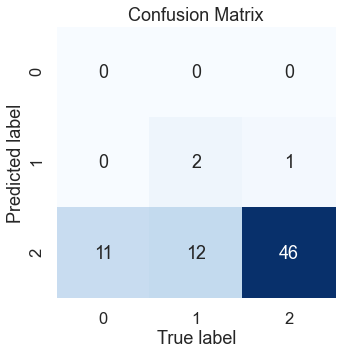

In [58]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = clf_GridSearchCV_forest.predict(X_test_count)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Blues',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [50]:
%%time
#Gridsearch

parameters = {
    "n_estimators":[5,50],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
    
clf_GridSearchCV_gbc = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,scoring='accuracy',cv=5)
clf_GridSearchCV_gbc.fit(X_train_tfidf_ngram_chars, y_train)

Wall time: 5min 11s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50]},
             scoring='accuracy')

In [51]:
clf_GridSearchCV_gbc.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}

In [52]:
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_gbc.predict(X_test_tfidf_ngram_chars),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_gbc.predict(X_test_tfidf_ngram_chars),y_test,average='weighted'))
print('Recall score:', recall_score(clf_GridSearchCV_gbc.predict(X_test_tfidf_ngram_chars),y_test,average='weighted'))

Accuracy test score: 0.6805555555555556
Precision score: 0.901469098277609
Recall score: 0.6805555555555556


Text(13.5, 0.5, 'Predicted label')

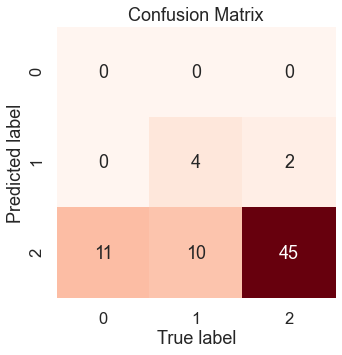

In [54]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = clf_GridSearchCV_gbc.predict(X_test_tfidf_ngram_chars)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Reds',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [39]:
%%time
#gridsearchcv - SVM
params_dict_SVM={'C':[0.001,0.01,0.1,1,10,100],
                 'gamma':[0.001,0.01,0.1,1,10,100],
                 'degree':[3,4,5],
                 'kernel':['linear', 'poly', 'rbf']}
clf_GridSearchCV_SVM=GridSearchCV(estimator=SVC(),param_grid=params_dict_SVM,scoring='accuracy',cv=5)
print(clf_GridSearchCV_SVM.fit(X_train_count,y_train))

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')
Wall time: 17.8 s


In [40]:
clf_GridSearchCV_SVM.best_params_

{'C': 100, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}

In [44]:
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_SVM.predict(X_test_count),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_SVM.predict(X_test_count),y_test,average='weighted'))
print('Recall score:', recall_score(clf_GridSearchCV_SVM.predict(X_test_count),y_test,average='weighted'))

Accuracy test score: 0.7361111111111112
Precision score: 0.782406128150809
Recall score: 0.7361111111111112


Text(13.5, 0.5, 'Predicted label')

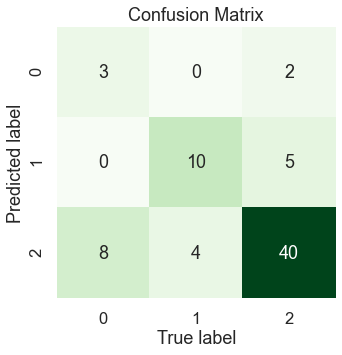

In [45]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

#confusion matrix
y_pred_class = clf_GridSearchCV_SVM.predict(X_test_count)
cf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cf_matrix.T, cmap = 'Greens',annot=True,fmt = 'd', cbar = False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



